In [1]:
import numpy as np
import six
import util
from math import sqrt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.tree

from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
DATADIR = 'data-PREPROCESSED'

In [3]:
x_train, y_train = util.load_training(DATADIR)
x_test, y_test = util.load_test(DATADIR)

In [4]:
x_train.shape

(2336, 25)

In [5]:
# establishing a base line
# the base line predictor will predict the mean 'Power Generated' value 
# of the training set
baseline = y_train.mean()
baseline

7003.48544520548

In [6]:
baseline_predictions = np.array([baseline] * y_test.shape[0])
baseline_predictions.shape

(584,)

In [7]:
baseline_rmse = sqrt(mean_squared_error(y_test, baseline_predictions))
baseline_rmse

10264.06748733132

In [8]:
# linear regression model

In [9]:
#linreg = LinearRegression(copy_X=True).fit(x_train, y_train)
#linreg_predictions = linreg.predict(x_test)

In [10]:
linreg = LinearRegression(copy_X=True)
ss = ShuffleSplit(n_splits=5, test_size=.2, random_state=42)

In [11]:
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    linreg.fit(x_train[train_index], y_train[train_index])
    preds = linreg.predict(x_train[test_index])
    linreg_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {linreg_rmse}')

RMSE for fold 1: 4912.7770072163075
RMSE for fold 2: 5054.1821222117205
RMSE for fold 3: 4957.4115538821225
RMSE for fold 4: 5091.423773368535
RMSE for fold 5: 5036.645525075755


In [12]:
columns = util.import_data('data-PREPROCESSED/x_train.csv').columns.to_list()

In [13]:
coefs = pd.DataFrame(linreg.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-8705.258894
Distance to Solar Noon,11773.938201
Average Temperature (Day),-1835.599545
Average Wind Direction (Day),1701.829704
Average Wind Speed (Day),-1881.603239
Visibility,-1363.844411
Relative Humidity,-10035.518381
Average Wind Speed (Period),6236.679093
Average Barometric Pressure (Period),2764.010503
Hours from Noon,-39398.875078


In [14]:
linreg_predictions = linreg.predict(x_test)
linreg_rmse = sqrt(mean_squared_error(y_test, linreg_predictions))
linreg_rmse

5134.940713278046

In [15]:
# ridge regressor

In [16]:
alphas = [.001, .01, .1, 1, 10]

In [17]:
ridge1 = Ridge(alpha=alphas[0])
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    ridge1.fit(x_train[train_index], y_train[train_index])
    preds = ridge1.predict(x_train[test_index])
    ridge1_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {ridge1_rmse}')

RMSE for fold 1: 4912.82301910195
RMSE for fold 2: 5054.179623083609
RMSE for fold 3: 4957.455894105827
RMSE for fold 4: 5091.431985095862
RMSE for fold 5: 5036.673574168195


In [18]:
coefs = pd.DataFrame(ridge1.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-8705.012960
Distance to Solar Noon,11765.871935
Average Temperature (Day),-1835.080815
Average Wind Direction (Day),1701.995495
Average Wind Speed (Day),-1881.138549
Visibility,-1363.217095
Relative Humidity,-10035.915112
Average Wind Speed (Period),6236.440242
Average Barometric Pressure (Period),2763.265816
Hours from Noon,-39392.235576


In [19]:
ridge1_predictions = ridge1.predict(x_test)
ridge1_rmse = sqrt(mean_squared_error(y_test, ridge1_predictions))
ridge1_rmse

5134.95896249489

In [20]:
ridge2 = Ridge(alpha=alphas[1])
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    ridge2.fit(x_train[train_index], y_train[train_index])
    preds = ridge2.predict(x_train[test_index])
    ridge2_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {ridge2_rmse}')

RMSE for fold 1: 4913.238310166879
RMSE for fold 2: 5054.159555197117
RMSE for fold 3: 4957.855863232039
RMSE for fold 4: 5091.508383230938
RMSE for fold 5: 5036.92737650444


In [21]:
coefs = pd.DataFrame(ridge2.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-8702.799469
Distance to Solar Noon,11693.508158
Average Temperature (Day),-1830.425618
Average Wind Direction (Day),1703.481100
Average Wind Speed (Day),-1876.966280
Visibility,-1357.587623
Relative Humidity,-10039.468687
Average Wind Speed (Period),6234.293895
Average Barometric Pressure (Period),2756.585233
Hours from Noon,-39332.661974


In [22]:
ridge2_predictions = ridge2.predict(x_test)
ridge2_rmse = sqrt(mean_squared_error(y_test, ridge2_predictions))
ridge2_rmse

5135.124769433706

In [23]:
ridge3 = Ridge(alpha=alphas[2])
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    ridge3.fit(x_train[train_index], y_train[train_index])
    preds = ridge3.predict(x_train[test_index])
    ridge3_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {ridge3_rmse}')

RMSE for fold 1: 4917.497650880678
RMSE for fold 2: 5054.184729284619
RMSE for fold 3: 4961.935628739967
RMSE for fold 4: 5092.503807856702
RMSE for fold 5: 5039.5897312311345


In [24]:
coefs = pd.DataFrame(ridge3.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-8680.657121
Distance to Solar Noon,10992.193652
Average Temperature (Day),-1785.157605
Average Wind Direction (Day),1717.712827
Average Wind Speed (Day),-1836.199509
Visibility,-1302.864363
Relative Humidity,-10073.373566
Average Wind Speed (Period),6213.149311
Average Barometric Pressure (Period),2691.851683
Hours from Noon,-38754.384784


In [25]:
ridge3_predictions = ridge3.predict(x_test)
ridge3_rmse = sqrt(mean_squared_error(y_test, ridge3_predictions))
ridge3_rmse

5136.927083069625

In [26]:
ridge4 = Ridge(alpha=alphas[3])
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    ridge4.fit(x_train[train_index], y_train[train_index])
    preds = ridge4.predict(x_train[test_index])
    ridge4_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {ridge4_rmse}')

RMSE for fold 1: 4963.963586425276
RMSE for fold 2: 5067.573932060662
RMSE for fold 3: 5004.757794783538
RMSE for fold 4: 5115.4800728720475
RMSE for fold 5: 5071.98344940645


In [27]:
coefs = pd.DataFrame(ridge4.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-8459.617308
Distance to Solar Noon,5675.422751
Average Temperature (Day),-1430.430520
Average Wind Direction (Day),1813.177794
Average Wind Speed (Day),-1502.470749
Visibility,-875.573028
Relative Humidity,-10289.391177
Average Wind Speed (Period),6026.921760
Average Barometric Pressure (Period),2201.374986
Hours from Noon,-34299.397312


In [28]:
ridge4_predictions = ridge4.predict(x_test)
ridge4_rmse = sqrt(mean_squared_error(y_test, ridge4_predictions))
ridge4_rmse

5162.459400076717

In [29]:
ridge5 = Ridge(alpha=alphas[4])
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    ridge5.fit(x_train[train_index], y_train[train_index])
    preds = ridge5.predict(x_train[test_index])
    ridge5_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {ridge5_rmse}')

RMSE for fold 1: 5230.481856629517
RMSE for fold 2: 5231.516851161101
RMSE for fold 3: 5213.080923093828
RMSE for fold 4: 5338.304736143031
RMSE for fold 5: 5277.4089962072485


In [30]:
coefs = pd.DataFrame(ridge5.coef_, columns, columns=['Coefficient'])
coefs

,Coefficient
Is Daylight,-6509.525120
Distance to Solar Noon,-6683.410807
Average Temperature (Day),-338.236867
Average Wind Direction (Day),1763.633978
Average Wind Speed (Day),-216.426298
Visibility,383.383415
Relative Humidity,-9729.528942
Average Wind Speed (Period),4982.578045
Average Barometric Pressure (Period),982.382501
Hours from Noon,-21978.191696


In [31]:
ridge5_predictions = ridge5.predict(x_test)
ridge5_rmse = sqrt(mean_squared_error(y_test, ridge5_predictions))
ridge5_rmse

5357.103195252271

In [32]:
ridge_rmses = [ridge1_rmse, ridge2_rmse, ridge3_rmse, ridge4_rmse, ridge5_rmse]
indexes = ['Ridge Model 1', 'Ridge Model 2', 'Ridge Model 3', 'Ridge Model 4', 'Ridge Model 5']
cols = ['Root Mean Squared Error (RMSE)']
pd.DataFrame(ridge_rmses, indexes, columns=cols)

,Root Mean Squared Error (RMSE)
Ridge Model 1,5134.958962
Ridge Model 2,5135.124769
Ridge Model 3,5136.927083
Ridge Model 4,5162.459400
Ridge Model 5,5357.103195


In [33]:
# decision tree regressor

In [34]:
dt = DecisionTreeRegressor(random_state=42)
for i, (train_index, test_index) in enumerate(ss.split(x_train, y_train)):
    dt.fit(x_train[train_index], y_train[train_index])
    preds = dt.predict(x_train[test_index])
    dt_rmse = sqrt(mean_squared_error(y_train[test_index], preds))
    print(f'RMSE for fold {i+1}: {dt_rmse}')

RMSE for fold 1: 4555.897038196712
RMSE for fold 2: 4281.52523471135
RMSE for fold 3: 3777.877010040355
RMSE for fold 4: 4716.119677216542
RMSE for fold 5: 3939.0899646999687


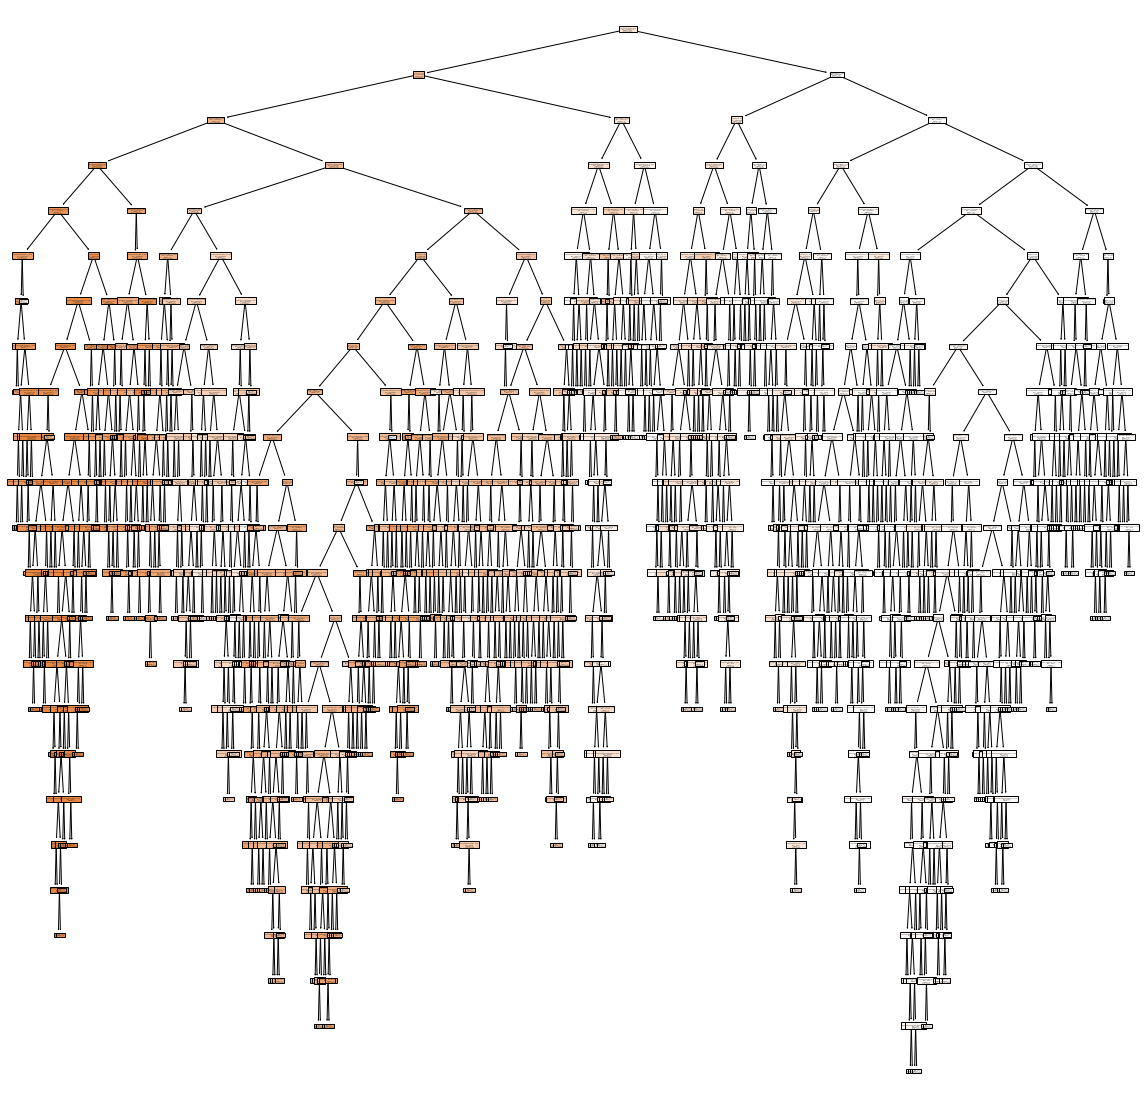

In [35]:
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
_ = sklearn.tree.plot_tree(dt, feature_names=columns, filled=True)

In [36]:
dt_preds = dt.predict(x_test)
dt_rmse = sqrt(mean_squared_error(y_test, dt_preds))
dt_rmse

4147.50369900006

In [37]:
# Ensemble using DecisionTreeRegressors

In [38]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=.2, random_state=42)

In [39]:
max_trees = 256

In [40]:
depths = [2**i for i in range(1, 3)]
depths

[2, 4]

In [41]:
learning_rates = [10**i for i in range(-3, 1)]
learning_rates

[0.001, 0.01, 0.1, 1]

In [42]:
best_estimators = list()
for depth in depths:
    for rate in learning_rates:
        
        error_increasing = 0
        min_val_error = float('inf')
        tree_ensemble = GradientBoostingRegressor(random_state=42, warm_start=True)
        
        for n_trees in range(1, max_trees):
            tree_ensemble.n_estimators = n_trees
            tree_ensemble.learning_rate=rate
            tree_ensemble.depth=depth
            
            tree_ensemble.fit(x_train, y_train)
            ensemble_preds = tree_ensemble.predict(x_val)
            ensemble_rmse = sqrt(mean_squared_error(y_val, ensemble_preds))
            if ensemble_rmse < min_val_error:
                min_val_error = ensemble_rmse
                error_increasing = 0
            else:
                error_increasing += 1
                if error_increasing == 5:
                    best_estimators.append((depth, rate, n_trees))
                    break   # early stop
                    
            # at max trees and error still decreasing
            if n_trees == max_trees - 1:
                best_estimators.append((depth, rate, n_trees))

In [43]:
for estimator in best_estimators:
    print(estimator)

(2, 0.001, 255)
(2, 0.01, 255)
(2, 0.1, 75)
(2, 1, 16)
(4, 0.001, 255)
(4, 0.01, 255)
(4, 0.1, 75)
(4, 1, 16)


In [44]:
depth, rate, n_trees = best_estimators[0]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees1 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees1.fit(x_train, y_train)

preds = trees1.predict(x_test)
t1_rmse = sqrt(mean_squared_error(y_test, preds))
t1_rmse

depth = 2, rate = 0.001, n_trees = 255


8482.699480796058

In [45]:
depth, rate, n_trees = best_estimators[1]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees2 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees2.fit(x_train, y_train)

preds = trees2.predict(x_test)
t2_rmse = sqrt(mean_squared_error(y_test, preds))
t2_rmse

depth = 2, rate = 0.01, n_trees = 255


3863.6698373703716

In [46]:
depth, rate, n_trees = best_estimators[2]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees3 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees3.fit(x_train, y_train)

preds = trees3.predict(x_test)
t3_rmse = sqrt(mean_squared_error(y_test, preds))
t3_rmse

depth = 2, rate = 0.1, n_trees = 75


3490.6828231302156

In [47]:
depth, rate, n_trees = best_estimators[3]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees4 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees4.fit(x_train, y_train)

preds = trees4.predict(x_test)
t4_rmse = sqrt(mean_squared_error(y_test, preds))
t4_rmse

depth = 2, rate = 1, n_trees = 16


3630.410823675644

In [48]:
depth, rate, n_trees = best_estimators[4]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees5 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees5.fit(x_train, y_train)

preds = trees5.predict(x_test)
t5_rmse = sqrt(mean_squared_error(y_test, preds))
t5_rmse

depth = 4, rate = 0.001, n_trees = 255


8281.428640756882

In [49]:
depth, rate, n_trees = best_estimators[5]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees6 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees6.fit(x_train, y_train)

preds = trees6.predict(x_test)
t6_rmse = sqrt(mean_squared_error(y_test, preds))
t6_rmse

depth = 4, rate = 0.01, n_trees = 255


3444.204323618948

In [50]:
depth, rate, n_trees = best_estimators[6]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees7 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees7.fit(x_train, y_train)

preds = trees7.predict(x_test)
t7_rmse = sqrt(mean_squared_error(y_test, preds))
t7_rmse

depth = 4, rate = 0.1, n_trees = 75


3178.610645073612

In [52]:
depth, rate, n_trees = best_estimators[7]
print(f'depth = {depth}, rate = {rate}, n_trees = {n_trees}')

trees8 = GradientBoostingRegressor(learning_rate=rate, n_estimators=n_trees, max_depth=depth, random_state=42)
trees8.fit(x_train, y_train)

preds = trees8.predict(x_test)
t8_rmse = sqrt(mean_squared_error(y_test, preds))
t8_rmse

depth = 4, rate = 1, n_trees = 16


3857.7033323190035

In [53]:
indexes = ['DT Model 1', 'DT Model 2', 'DT Model 3', 'DT Model 4', 'DT Model 5', 'DT Model 6', 'DT Model 7', 'DT Model 8']
model_specifics = [f'd={d}, lr={lr}, ntrees={nt}' for d, lr, nt in best_estimators]
rmse_data = [t1_rmse, t2_rmse, t3_rmse, t4_rmse, t5_rmse, t6_rmse, t7_rmse, t8_rmse]
cols = ['Model Specifics', 'Root Mean Squared Error (RMSE)']
pd.DataFrame(zip(model_specifics, rmse_data), indexes, columns=cols)

,Model Specifics,Root Mean Squared Error (RMSE)
DT Model 1,"d=2, lr=0.001, ntrees=255",8482.699481
DT Model 2,"d=2, lr=0.01, ntrees=255",3863.669837
DT Model 3,"d=2, lr=0.1, ntrees=75",3490.682823
DT Model 4,"d=2, lr=1, ntrees=16",3630.410824
DT Model 5,"d=4, lr=0.001, ntrees=255",8281.428641
DT Model 6,"d=4, lr=0.01, ntrees=255",3444.204324
DT Model 7,"d=4, lr=0.1, ntrees=75",3178.610645
DT Model 8,"d=4, lr=1, ntrees=16",3857.703332


In [54]:
# comparison of best models
rmse_data = [baseline_rmse, linreg_rmse, ridge1_rmse, dt_rmse, t7_rmse]
indexes = ['Baseline', 'Linear Regression', 'Ridge Regression', 'Decision Tree', 'DT Ensemble']
cols = ['Root Mean Squared Error (RMSE)']
pd.DataFrame(rmse_data, indexes, columns=cols)

,Root Mean Squared Error (RMSE)
Baseline,10264.067487
Linear Regression,5134.940713
Ridge Regression,5134.958962
Decision Tree,4147.503699
DT Ensemble,3178.610645
